# Analyzing Amazon Bestsellers

Amazon releases hundreds and thousands of paperback and ebooks daily, with over 50,000 ebooks getting released every month. And as of March 2023, there are no more than 12 million ebooks sold on Amazon. In the midst of this chaotic supply of words and ideas, many readers and intrigued customers can find it hard to select a book. The Amazon Bestsellers section highlights books based on various factors like the amount of sales, the frequency of sales per a certain time period, best sellers rank, etc.

But as time passes on, the world changes, and so do things that intrigue customers. Analyzing how this data changes can aid in market researcu, competetive analysis, trend analysis and price analysis to name a few. 

---

## About the Dataset

This dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, which has been categorized into fiction and non-fiction using Goodreads. 

The dataset contains the following information for each instance:

- Title: The title of the book
- Author: The name of the person who wrote the book
- Rating: The average customer rating out of 5
- Reviews: The total amount of customer reviews
- Price: The price of the book in USD, rounded to the nearest dollar
- Publication Year: The year the book was published
- Genre: The genre of the book

In [ ]:
##import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
##loading the data 
df = pd.read_csv("bestsellers.csv")
df.drop_duplicates(inplace=True)
df.rename(columns={"Name": "Title", "Year": "Publication Year", "User Rating": "Rating"}, inplace=True)

In [10]:
#changing the "Price" column to float
df["Price"] = df["Price"].astype(float)

In [12]:
df.head(20)

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11.0,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30.0,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15.0,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3.0,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8.0,2016,Fiction


---

### Question 1: Which author appears most frequently among Amazon’s Top 50 Bestsellers (2009–2019)?

In [62]:
author_counts = df["Author"].value_counts()
highest_author_counts = author_counts.nlargest(1).index

ans1 = highest_author_counts[0]
ans1

ans1

'Jeff Kinney'

### Question 2: What is the average price of Fiction vs. Non Fiction bestsellers?

In [14]:
ans2 = df.groupby("Genre")["Price"].mean()
ans2

Genre
Fiction        10.850000
Non Fiction    14.841935
Name: Price, dtype: float64

### Question 3: Which single book received the highest number of user reviews in the dataset?

In [ ]:
max_revs = df["Reviews"].max()
ans3 = df.loc[df["Reviews"]== max_revs]
ans3

np.int64(87841)

### Question 4: How many unique authors had bestsellers that appeared in multiple years?

In [65]:
authors_year_counts = df.groupby("Author")["Publication Year"].nunique()
filtered_authors = authors_year_counts[authors_year_counts>1]
ans4 = filtered_authors.shape[0]
ans4

111

### Question 5: What is the trend in average user ratings of bestsellers across the years 2009-2019?

In [ ]:
ans5 = df.groupby("Publication Year")["Rating"].mean().round(3)
ans5

Publication Year
2009    4.584
2010    4.558
2011    4.558
2012    4.532
2013    4.554
2014    4.622
2015    4.648
2016    4.678
2017    4.660
2018    4.668
2019    4.740
Name: Rating, dtype: float64

### Question 6: Which year has the highest average number of reviews per bestseller?

In [34]:
avg_revs = df.groupby("Publication Year")["Reviews"].mean().round(1)

ans6 = avg_revs.idxmax()
ans6

np.int64(2019)

### Question 7: Is there a correlation between a book's price and the number of reviews it recieved?

In [35]:
price_revs_corr = df[["Price", "Reviews"]].corr()

ans7 = price_revs_corr.loc["Price", "Reviews"]
ans7

np.float64(-0.10918188342780513)

### Question 8: Which top 5 books appeared in the Amazon Bestseller list across the most years?

In [42]:
ans8 = (
    df.groupby("Title")["Publication Year"]
    .nunique()
    .sort_values(ascending=False)
    .head()
)
ans8

Title
Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
Name: Publication Year, dtype: int64

### Question 9: For each year, which author had the most books in the Top 50 Bestsellers?

In [46]:
counts_author = df.groupby(["Publication Year","Author"]).size().reset_index(name="Count")

ans9 = (
    counts_author
    .sort_values(["Publication Year","Count","Author"], ascending=[True, False, True])
    .groupby("Publication Year")
    .head(1)
    .reset_index(drop=True)
)

ans9

,Publication Year,Author,Count
0,2009,Stephenie Meyer,6
1,2010,Rick Riordan,4
2,2011,Suzanne Collins,4
3,2012,E L James,4
4,2013,Rob Elliott,2
5,2014,John Green,3
6,2015,Blue Star Coloring,2
7,2016,J.K. Rowling,4
8,2017,Rupi Kaur,2
9,2018,Dav Pilkey,3


### Question 10: How does the price variability (variance) compare between Fiction and Non Fiction bestsellers?

In [53]:
var_genre = df.groupby("Genre")["Price"].var()
std_genre = df.groupby("Genre")["Price"].std()

ans10 = pd.concat([var_genre.rename("Variance"),
                   std_genre.rename("Std")], axis=1)

ans10

,Variance,Std
Genre,,
Fiction,73.49205,8.572750
Non Fiction,145.03966,12.043241


### Question 11: What percentage of bestsellers with a user rating ≥ 4.8 belong to Non Fiction?

In [ ]:
matched_rating = df[df["Rating"] >= 4.8]
ans11 = (matched_rating["Genre"].eq("Non Fiction").mean() * 100) if len(matched_rating) else np.nan

,Title,Author,Rating,Reviews,Price,Publication Year,Genre
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction
19,Alexander Hamilton,Ron Chernow,4.8,9198,13.0,2016,Non Fiction
30,Barefoot Contessa Foolproof: Recipes You Can T...,Ina Garten,4.8,1296,24.0,2012,Non Fiction
32,Becoming,Michelle Obama,4.8,61133,11.0,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11.0,2019,Non Fiction
...,...,...,...,...,...,...,...
518,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,13.0,2014,Non Fiction
519,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16.0,2014,Non Fiction
521,Unfreedom of the Press,Mark R. Levin,4.9,5956,11.0,2019,Non Fiction
522,Unicorn Coloring Book: For Kids Ages 4-8 (US E...,Silly Bear,4.8,6108,4.0,2019,Non Fiction


### Question 12: Among authors with at least 3 bestselling books, which author has the highest average rating?

In [67]:
abc = df["Author"].value_counts()
author_list = abc[abc>=3].index
ans12 = (
    df[df["Author"].isin(author_list)]
    .groupby("Author")["Rating"].mean()
    .sort_values(ascending=False)
    .head(1)
)
ans12

Author
Eric Carle    4.9
Name: Rating, dtype: float64

### Question 13: Which year had the lowest median price for bestselling books, and what was that price?

In [71]:
ans13 = (
    df.groupby("Publication Year")["Price"].median()
    .sort_values()
    .head(1)
)
ans13

Publication Year
2018    8.0
Name: Price, dtype: float64

### Question 14: How many bestsellers priced above $20 still managed to achieve a rating ≥ 4.7?

In [74]:
priced_20_more = df[df["Price"]>20]

ans14 = priced_20_more["Rating"].ge(4.7).sum()
ans14

np.int64(30)

### Question 15: Does the dataset suggest a relationship between the number of reviews and user ratings (e.g., do heavily reviewed books tend to have higher ratings)?

In [ ]:
corr_rev_rat = df[["Reviews", "Rating"]].corr()
ans15 = corr_rev_rat.loc["Reviews", "Rating"]
ans15

print(f"The relationship between the number of reviews and ratings is {ans15.round(6)}. This suggests that the amount of reviews and user ratings have a weak negative correlation")
print("That is, on average, for every 1000 increase in reviews, ratings decrease by 1.729")


The relationship between the number of reviews and ratings is -0.001729. This suggests that the amount of reviews and user ratings have a weak negative correlation
That is, on average, for every 1000 increase in reviews, ratings decrease by 1.


### Question 16: Using a pivot table, how did the distribution of Fiction vs. Non Fiction bestsellers change from 2009 to 2019?

In [90]:
count_pivot = pd.pivot_table(
    df, 
    index="Publication Year", 
    columns="Genre", 
    values="Title", 
    aggfunc="count", 
    fill_value=0
)
if {"Fiction","Non Fiction"}.issubset(count_pivot.columns):
    count_pivot = count_pivot[["Fiction","Non Fiction"]]
pivot_pct = (count_pivot.div(count_pivot.sum(axis=1), axis=0) * 100).round(1)

pivot_pct

Genre,Fiction,Non Fiction
Publication Year,,
2009,48.0,52.0
2010,40.0,60.0
2011,42.0,58.0
2012,42.0,58.0
2013,48.0,52.0
2014,58.0,42.0
2015,34.0,66.0
2016,38.0,62.0
2017,48.0,52.0


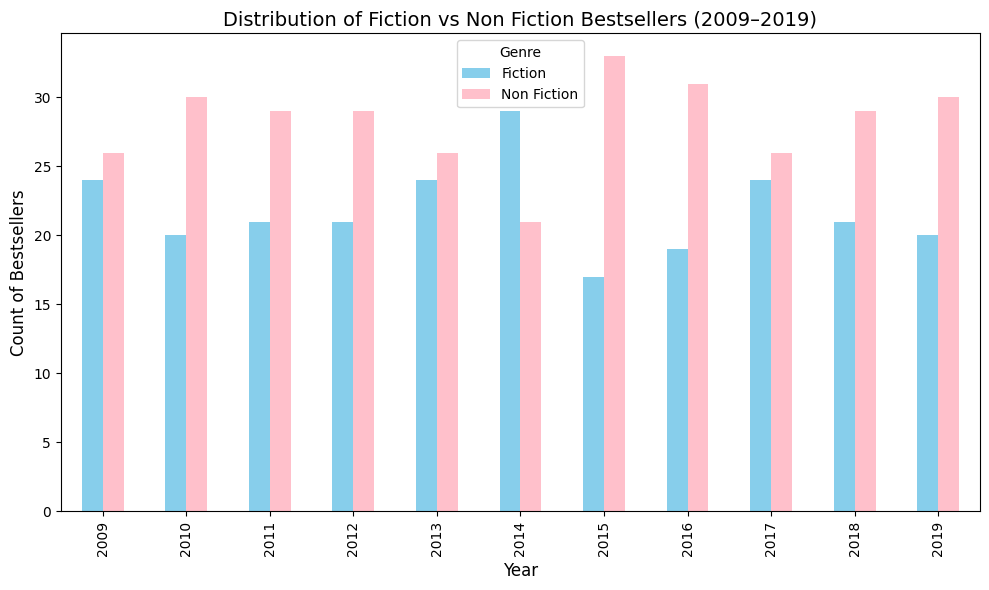

In [114]:
# Plot stacked bar chart
count_pivot.plot(
    kind="bar",
    stacked=False,
    figsize=(10, 6),
    color = ["skyblue", "pink"]
)

plt.title("Distribution of Fiction vs Non Fiction Bestsellers (2009–2019)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count of Bestsellers", fontsize=12)
plt.legend(title="Genre")
plt.tight_layout()
plt.show()


### Question 17: Which author had the most consistent user ratings (lowest standard deviation across all their bestsellers)?

In [99]:
df_agg = df.groupby("Author")["Rating"].agg(["std","count"])
df_agg = df_agg[df_agg["count"]>=2].copy()
df_agg["std"] = df_agg["std"].fillna(0).round(4)
ans17 = df_agg.sort_values(by=["std", "count"]).head(1)
ans17


,std,count
Author,,
Abraham Verghese,0.0,2


### Question 18: If you group bestsellers into price quartiles, how do their average number of reviews differ across quartiles?

In [103]:
df["Price quartile"] = pd.qcut(df["Price"], 4, duplicates= "drop")

ans18 = df.groupby("Price quartile")["Reviews"].mean().round(2)
ans18

/var/folders/41/v432s3710md0b49y0m1xkk2c0000gn/T/ipykernel_52884/2525304270.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ans18 = df.groupby("Price quartile")["Reviews"].mean().round(2)


Price quartile
(-0.001, 7.0]    11404.93
(7.0, 11.0]      14660.89
(11.0, 16.0]     13028.88
(16.0, 105.0]     8103.21
Name: Reviews, dtype: float64

### Question 19: For books in multiple years: rating trend (improve/decline/stable) via slope

In [108]:
def slope_per_book(g):
    tmp = g[["Publication Year","Rating"]].dropna().drop_duplicates().sort_values("Publication Year")
    if tmp["Publication Year"].nunique() < 2:
        return np.nan
    x = tmp["Publication Year"].values
    y = tmp["Rating"].values
    return np.polyfit(x, y, 1)[0]

In [110]:
multi_year_books = df.groupby("Title").filter(lambda g: g["Publication Year"].nunique() > 1)

slopes = (
    multi_year_books.groupby("Title")
    .apply(slope_per_book)
    .dropna()
    .rename("slope_per_year")
)

improving = (slopes > 0).sum()
declining = (slopes < 0).sum()
stable = (slopes.abs() < 1e-6).sum()
ans19 = slopes.mean() if not slopes.empty else np.nan
ans19

/var/folders/41/v432s3710md0b49y0m1xkk2c0000gn/T/ipykernel_52884/714711742.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(slope_per_book)


np.float64(0.00017160404624275618)

### Question 20: Year-wise leaderboard: top 3 authors by cumulative reviews

In [113]:
rev_by_yr = df.groupby(["Publication Year","Author"])["Reviews"].sum().reset_index()
rev_by_yr["Rank"] = rev_by_yr.groupby("Publication Year")["Reviews"].rank(method="dense", ascending=False)

ans20 = (
    rev_by_yr[rev_by_yr["Rank"] <= 3]
    .sort_values(["Publication Year","Rank","Author"])
    .reset_index(drop=True)
)

ans20

,Publication Year,Author,Reviews,Rank
0,2009,Stephenie Meyer,41936,1.0
1,2009,William P. Young,19720,2.0
2,2009,Stieg Larsson,17810,3.0
3,2010,Suzanne Collins,81477,1.0
4,2010,Laura Hillenbrand,29673,2.0
5,2010,Stieg Larsson,25557,3.0
6,2011,Suzanne Collins,98426,1.0
7,2011,Laura Hillenbrand,29673,2.0
8,2011,Kathryn Stockett,27742,3.0
9,2012,E L James,105122,1.0
